## Subiectul 1

1.Descarcam baza de date.

In [1]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
import matplotlib.pyplot as plt
import sys
import sklearn
import matplotlib
import numpy as np

from matplotlib.cm import binary
from sklearn.cluster import MiniBatchKMeans

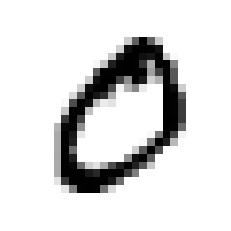

In [5]:
some_digit_image = X[1].reshape(28, 28)
plt.imshow(some_digit_image, cmap=binary, interpolation="nearest")
plt.axis('off')
plt.show()

In [9]:
X.size
X.shape

(70000, 784)

Am luat 1000 de elemente lucra mai usor si a configura mai rapid codul scris.

In [11]:
X1=X[:1000,:]

Folosim Metoda Elbow pentru a gasi numarul de clustere:

In [14]:
# Using the Elbow method

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


Ks = range(1,800,100)
km = [KMeans(n_clusters=i) for i in Ks]
#score = [km[i].fit(X).inertia_ for i in range(len(km))]
score = [km[i].fit(X1).inertia_ for i in range(len(km))]
plt.plot(Ks,score,'-ob')
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Objective function',fontsize=20)
plt.title("Elbow method",fontsize=20)
plt.suptitle("Elbow method for KMeans clustering on sample data",fontsize=14, fontweight='bold')


'4'

Folosim si o alta metoda pentru a aproxima numarul de clustere

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
X1=X[:1000]
(fig,axes) = plt.subplots(1,len(range_n_clusters))
fig.set_size_inches(18, 10)
current_axis = 0;

for n_clusters in range_n_clusters:
    
    axes[current_axis].set_xlim([-0.1, 1])
    axes[current_axis].set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters,algorithm='elkan', random_state=rand_state)
    cluster_labels = clusterer.fit_predict(X1)

    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        axes[current_axis].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axes[current_axis].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axes[current_axis].set_title("Silhouette plot for %d clusters"%n_clusters)
    axes[current_axis].set_xlabel("Silhouette coefficient values")
    axes[current_axis].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axes[current_axis].axvline(x=silhouette_avg, color="red", linestyle="--")
    axes[current_axis].set_yticks([])
    axes[current_axis].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    current_axis = current_axis+1
    plt.suptitle("Silhouette analysis for KMeans clustering on sample data",
                 fontsize=14, fontweight='bold')


Aplicam un algoritm

In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

In [ ]:
kmeans.labels_

In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import v_measure_score

def calculate_metrics(estimator, data, labels):
    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))
    print('V measure score: {}'.format(v_measure_score(labels, estimator.labels_)))
    

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print('Train Data: ', X_train, '\n', 'Test Data:', X_test, '\n','Train label: ', y_train, '\n', 'Test Label: ', y_test)

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
   
    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(y[:20])

In [ ]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X5)
    
    # print cluster metrics
    calculate_metrics(estimator, X5, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))